In [1]:
!pip install xgboost

In [2]:

import pandas as pd
import numpy as np
 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [3]:
df = pd.read_csv('CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
df.dtypes


status       int64
seniority    int64
home         int64
time         int64
age          int64
marital      int64
records      int64
job          int64
expenses     int64
income       int64
assets       int64
debt         int64
amount       int64
price        int64
dtype: object

In [6]:
status_map = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}
df['status'] = df['status'].map(status_map)


In [7]:
df.head()



,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [8]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}
df.home = df.home.map(home_values)
 
marital_values = {
    1: 'single', 
    2: 'married', 
    3: 'widow', 
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}
df.marital = df.marital.map(marital_values)
 
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}
df.records = df.records.map(records_values)
 
job_values = {
    1: 'fixed', 
    2: 'partime', 
    3: 'freelance', 
    4: 'others',
    0: 'unk'
}
df.job = df.job.map(job_values)
 
df.head()


,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [9]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [10]:
df.dtypes

status       object
seniority     int64
home         object
time          int64
age           int64
marital      object
records      object
job          object
expenses      int64
income        int64
assets        int64
debt          int64
amount        int64
price         int64
dtype: object

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


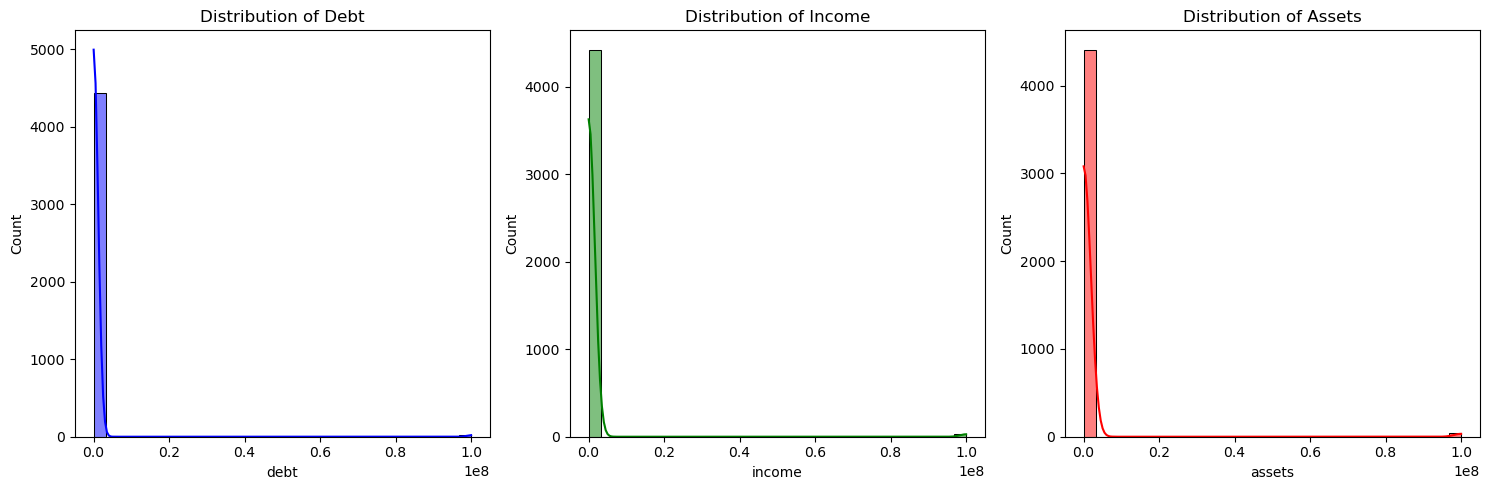

In [11]:
plt.figure(figsize=(15, 5))

# الرسم البياني للعمود 'debt'
plt.subplot(1, 3, 1)
sns.histplot(df['debt'], kde=True, color='blue', bins=30)
plt.title('Distribution of Debt')

# الرسم البياني للعمود 'income'
plt.subplot(1, 3, 2)
sns.histplot(df['income'], kde=True, color='green', bins=30)
plt.title('Distribution of Income')

# الرسم البياني للعمود 'assets'
plt.subplot(1, 3, 3)
sns.histplot(df['assets'], kde=True, color='red', bins=30)
plt.title('Distribution of Assets')

# تحسين التوزيع ليظهر بشكل جيد
plt.tight_layout()

# عرض الرسومات
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

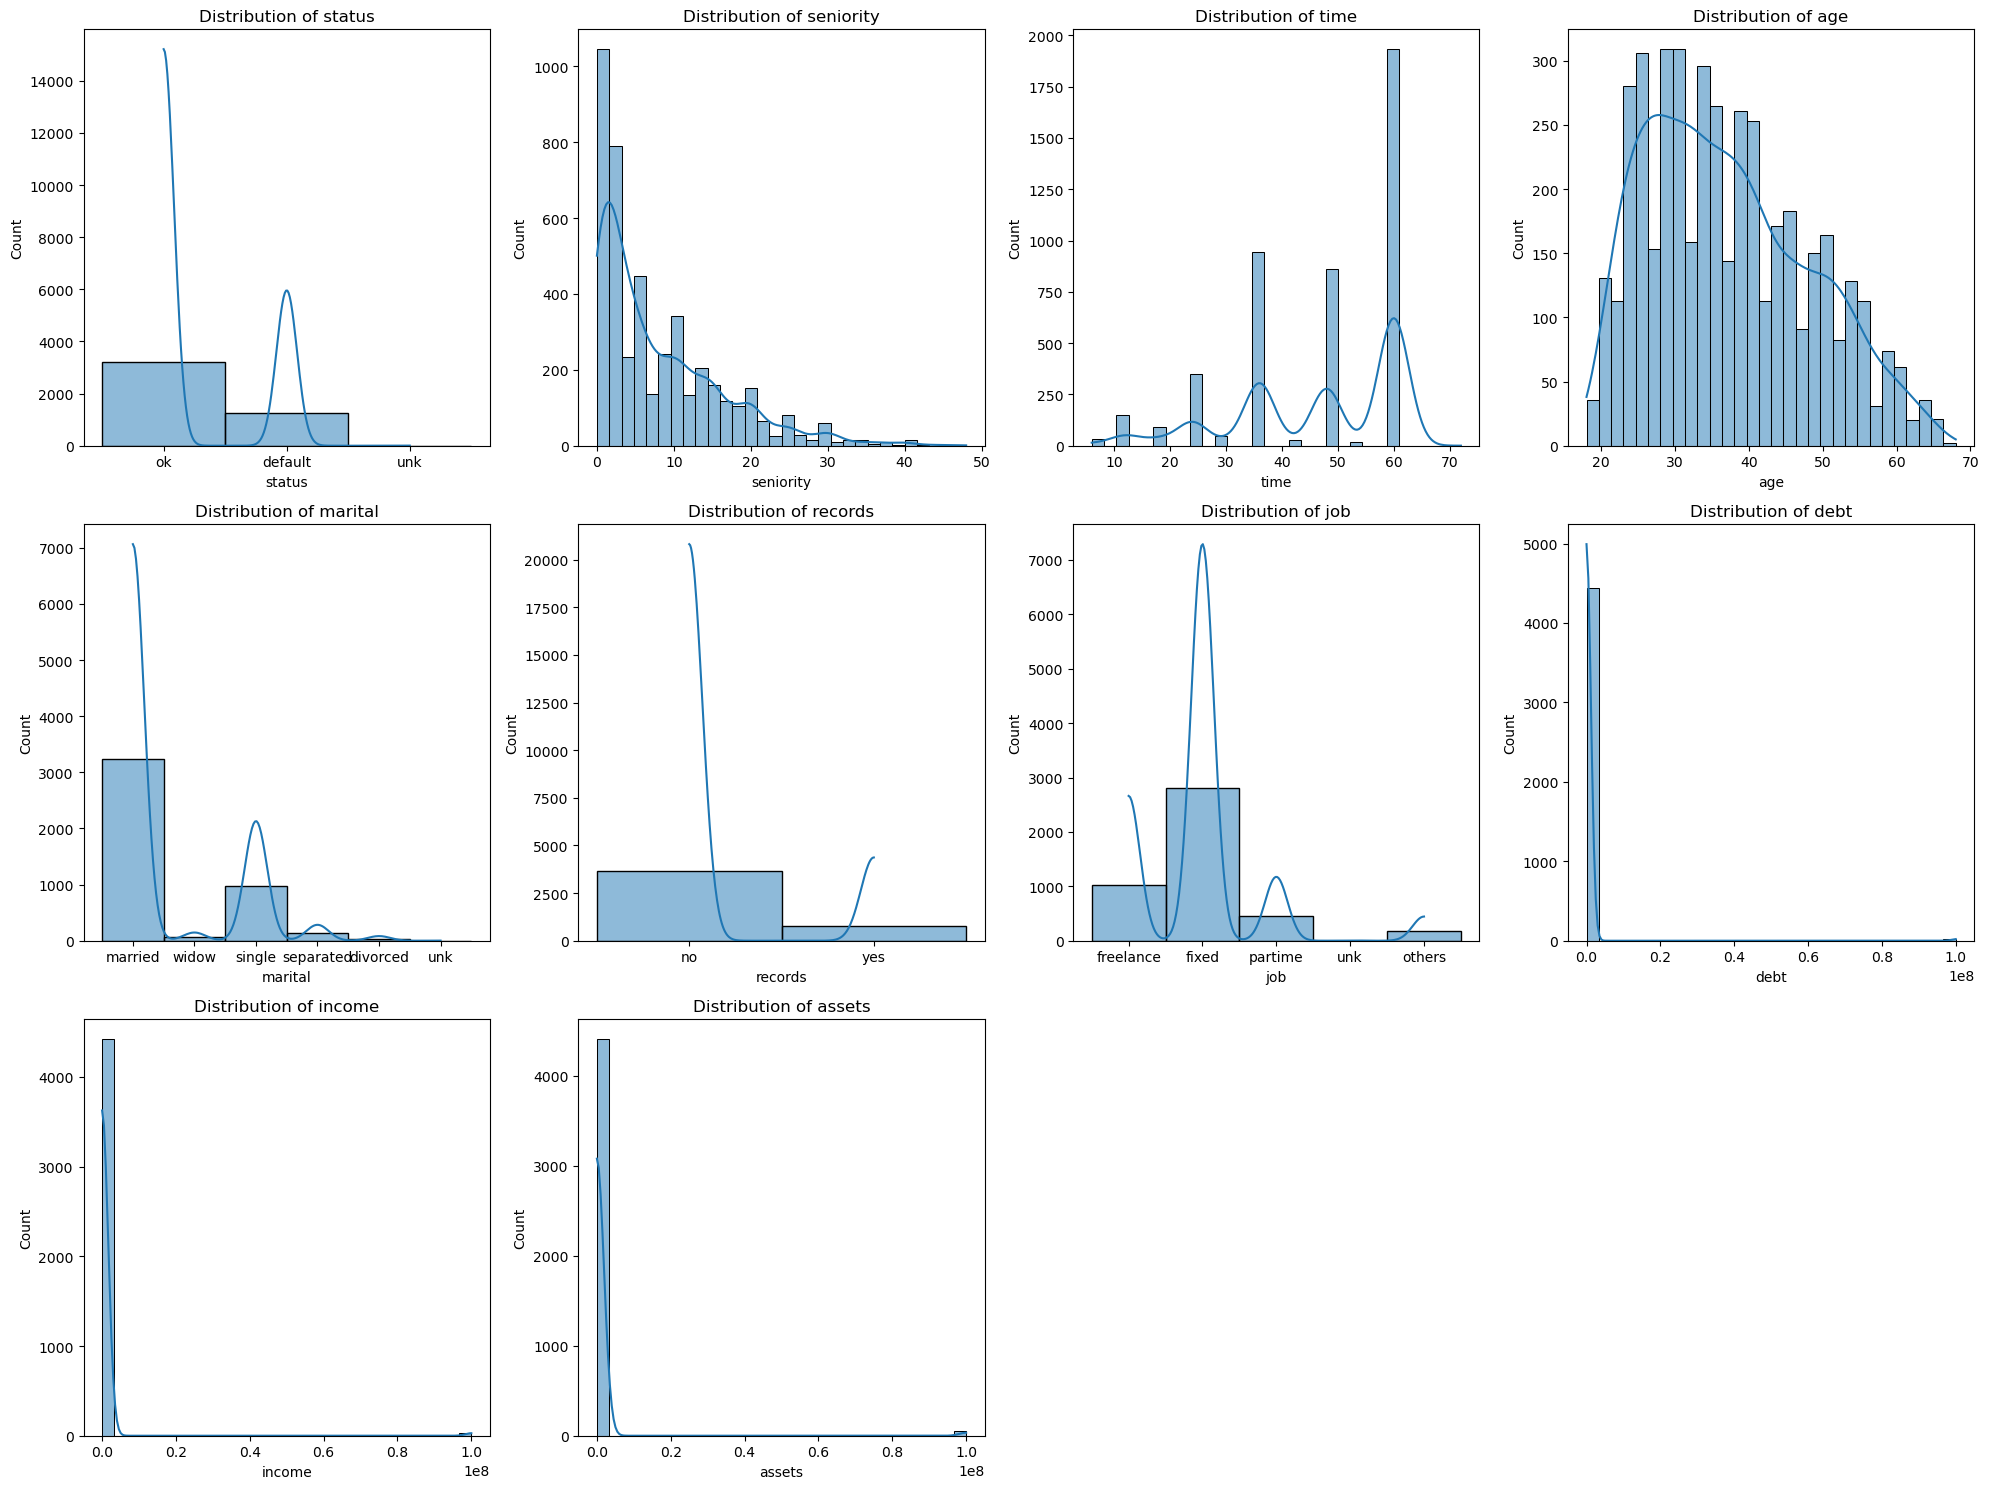

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# تحديد الأعمدة اللي عايز تعرضها
columns_to_plot = ['status', 'seniority', 'time', 'age', 'marital', 'records', 'job', 'debt', 'income', 'assets']

# إنشاء الشكل
plt.figure(figsize=(20, 15))

# تكرار الأعمدة وعرض التوزيع البياني لكل عمود
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 4, i)  # 3 صفوف و 4 أعمدة في الرسم البياني
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

# تحسين التوزيع ليظهر بشكل جيد
plt.tight_layout()

# عرض الرسومات
plt.show()


In [13]:
threshold = 1000000
df.loc[df.income > threshold, 'income'] = np.nan


In [14]:
df.income.max()

959.0

In [15]:
df.income.max()
# Output: 99999999
 
df.income.replace(to_replace=99999999, value=np.nan)
 
df.income.replace(to_replace=99999999, value=np.nan).max()
# Output: 959.0

959.0

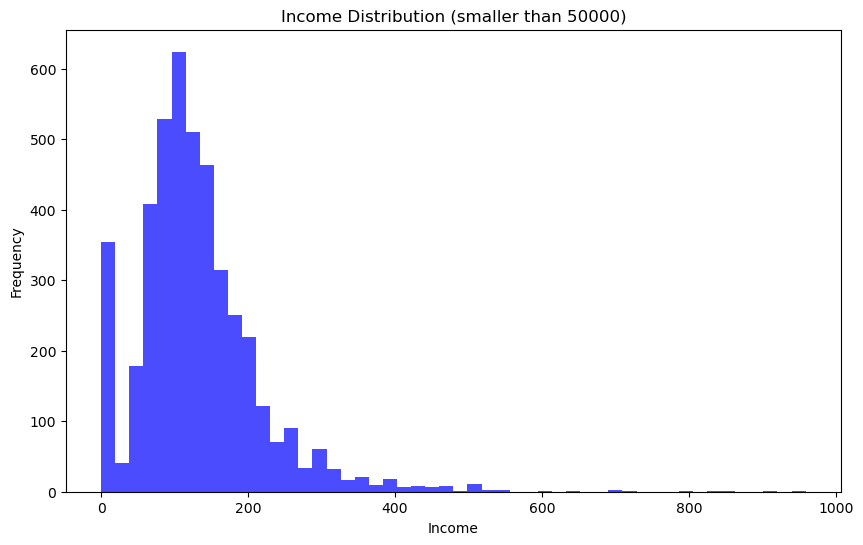

In [16]:
filtered_data = df.loc[df['income'] < 50000]

# رسم البيانات
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['income'], bins=50, color='blue', alpha=0.7)
plt.title('Income Distribution (smaller than 50000)')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Filter the data to show only the values greater than 1000 in the 'income' column
filtered_data = df.loc[df['income'] > 1000]

# Count the number of values
num_values = len(filtered_data)
print(f'The number of values in "income" greater than 1000: {num_values}')


The number of values in "income" greater than 1000: 0


In [18]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)
 
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [19]:
df.status.value_counts()
 
# Output:
# ok         3200
# default    1254
# unk           1
# Name: status, dtype: int64
 
df = df[df.status != 'unk'].reset_index(drop=True)
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4450,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4451,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4452,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


### data split

In [20]:
from sklearn.model_selection import train_test_split
 
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)
 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
 
df_train.status

0       default
1       default
2            ok
3       default
4            ok
         ...   
2667         ok
2668         ok
2669         ok
2670         ok
2671         ok
Name: status, Length: 2672, dtype: object

### convert target variable ‘status’ into a numerical format

In [21]:
(df_train.status == 'default').astype('int')


0       1
1       1
2       0
3       1
4       0
       ..
2667    0
2668    0
2669    0
2670    0
2671    0
Name: status, Length: 2672, dtype: int32

In [22]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values
 
del df_train['status']
del df_val['status']
del df_test['status']
 
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


### encoding categorical features

In [23]:
train_dicts = df_train.fillna(0).to_dict(orient='records')


In [24]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [25]:
dv.get_feature_names_out()


array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

### Training vs Validation AUC

In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
 


DecisionTreeClassifier()

### validation data

In [27]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6596171078443245

### training data

In [28]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

### control the depth to prevent overfitting

#### max_depth=3

In [29]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
 
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train', auc)

 
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val', auc)


train 0.7761016984958594
val 0.7389079944782155


In [30]:
names = dv.get_feature_names_out().tolist()
print(export_text(dt, feature_names=names))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0



#### max_depth=1 (Decision Stump)


In [31]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)
 
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train', auc)

 
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val', auc)


train 0.6282660131823559
val 0.6058644740984719


### visualization

In [32]:
print(export_text(dt))


|--- feature_26 <= 0.50
|   |--- class: 0
|--- feature_26 >  0.50
|   |--- class: 1



In [33]:
names = dv.get_feature_names_out().tolist()
print(export_text(dt, feature_names=names))

|--- records=yes <= 0.50
|   |--- class: 0
|--- records=yes >  0.50
|   |--- class: 1



#### max_depth=2 

In [34]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)
 
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train', auc)

 
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val', auc)


train 0.7054989859726213
val 0.6685264343319367


In [35]:
print(export_text(dt))


|--- feature_25 <= 0.50
|   |--- feature_27 <= 6.50
|   |   |--- class: 1
|   |--- feature_27 >  6.50
|   |   |--- class: 0
|--- feature_25 >  0.50
|   |--- feature_16 <= 0.50
|   |   |--- class: 0
|   |--- feature_16 >  0.50
|   |   |--- class: 1



In [36]:
names = dv.get_feature_names_out().tolist()
print(export_text(dt, feature_names=names))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1



### max_depth

In [37]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
 
for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
     
    # remember we need the column with negative scores
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
     
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.746
  10 -> 0.704
  15 -> 0.671
  20 -> 0.659
None -> 0.668


optimal depth falls between 4 and 6

### min_samples_leaf

In [38]:
scores = []
 
for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)
 
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
         
        scores.append((d, s, auc))
 
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.659926
1,4,2,0.687462
2,4,5,0.716188
3,4,10,0.759805
4,4,15,0.787738


In [39]:
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
22,6,15,0.788556
4,4,15,0.787738
13,5,15,0.787314
5,4,20,0.782540
23,6,20,0.781781


In [40]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.660  0.663  0.653
2                 0.687  0.687  0.688
5                 0.716  0.717  0.715
10                0.760  0.766  0.762
15                0.788  0.787  0.789
20                0.783  0.782  0.782
100               0.779  0.779  0.780
200               0.768  0.768  0.768
500               0.680  0.680  0.680

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

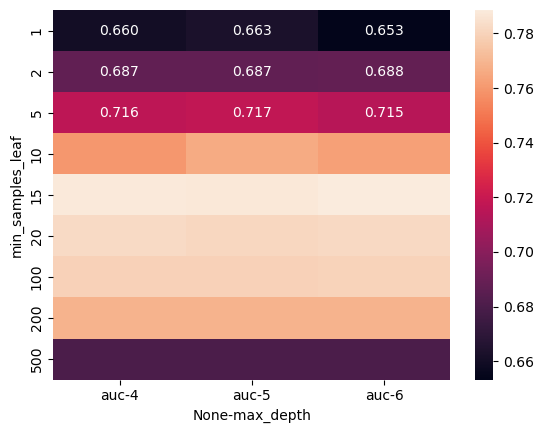

In [41]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [42]:
scores = []
 
for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)
 
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
         
        scores.append((d, s, auc))
 
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
 
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
31,7.0,15,0.787638
40,10.0,15,0.787127
13,5.0,15,0.787012
58,20.0,15,0.786745
4,4.0,15,0.786567


Interestingly, in each of these top five cases, ‘min_samples_leaf‘ is set to 15

 final tuned parameters: ‘max_depth‘ set to 5 and ‘min_samples_leaf‘ set to 15.

In [43]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.651  0.654  0.659  0.659  0.660  0.660  0.642  0.649
2                 0.687  0.682  0.679  0.698  0.687  0.708  0.665  0.695
5                 0.717  0.720  0.710  0.714  0.716  0.717  0.722  0.714
10                0.764  0.759  0.765  0.759  0.758  0.766  0.758  0.764
15                0.785  0.787  0.787  0.786  0.788  0.787  0.786  0.787
20                0.784  0.783  0.781  0.784  0.782  0.783  0.781  0.783
100               0.780  0.780  0.779  0.780  0.779  0.779  0.779  0.779
200               0.768  0.768  0.768  0.768  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680  0.680  0.680

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

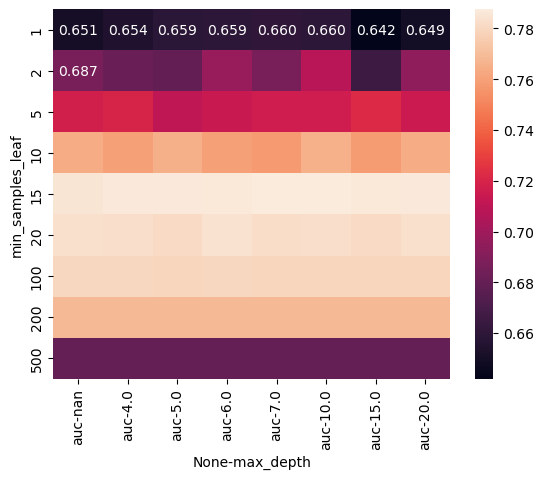

In [44]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [45]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [46]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))


|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- assets <= 4250.00
|   |   |   |   |--- income <= 20.00
|   |   |   |   |   |--- seniority <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- seniority >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- income >  20.00
|   |   |   |   |   |--- expenses <= 71.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- expenses >  71.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  4250.00
|   |   |   |   |--- debt <= 1600.00
|   |   |   |   |   |--- seniority <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- seniority >  2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- debt >  1600.00
|   |   |   |   |   |--- class: 1
|   |   |--- income >  74.50
|   |   |   |--- seniority <= 5.50
|   |   |   |   |--- amount <= 1330.00
|   |   |   |   |   |--- assets <= 3326.00
|   |   |   |   |   |   |--- clas

### random forest

In [47]:
# n_estimators - number of models we want to use
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)
 
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)
 

0.7744726453706618

In [48]:
rf.predict_proba(X_val[[0]])


array([[0.9, 0.1]])

### number of estimators

In [49]:
scores = []
 
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
 
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
     
    scores.append((n, auc))
 
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


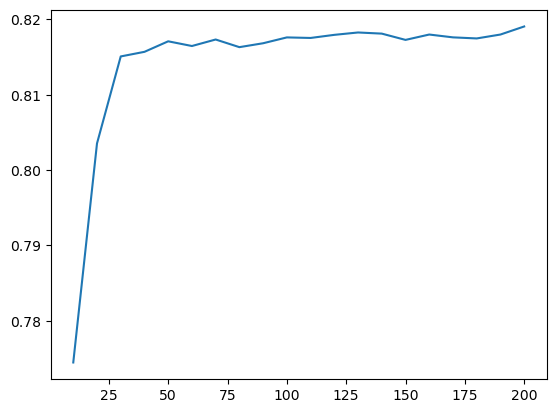

In [50]:
# x-axis - n_estimators
# y-axis - auc score
plt.plot(df_scores.n_estimators, df_scores.auc)

### max depth

In [51]:
scores = []
 
for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)
 
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
 
        scores.append((d, n, auc))
 
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


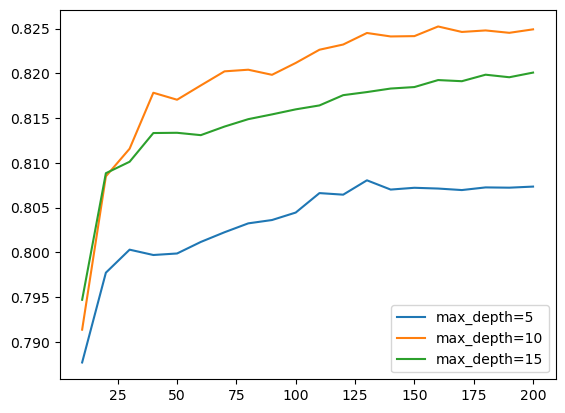

In [52]:
# Let's plot it
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
     
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)
 
plt.legend()

In [53]:
# Let's select 10 as the best value
max_depth = 10

### min_samples_leaf

In [54]:
scores = []
 
for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)
 
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
 
        scores.append((s, n, auc))
 
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [55]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
list(zip(min_samples_leaf_values, colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

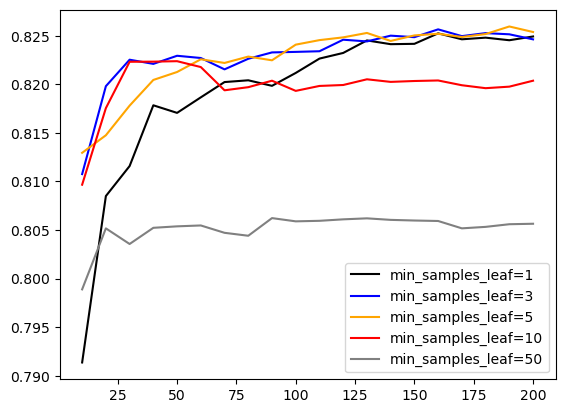

In [56]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
 
for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
     
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)
 
plt.legend()

‘min_samples_leaf’ of 3 stands out a good choice

In [57]:
# Let's select 3 as the best value
min_samples_leaf = 3

### train the model with best parameters

In [58]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)
 

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_jobs=-1,
                       random_state=1)

### XGBoost

In [59]:
dtrain = xgb.DMatrix(X_train, label=y_train)


In [65]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
     
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round= 10)

In [66]:
dval = xgb.DMatrix(X_val, label=y_val)

y_pred = model.predict(dval)

In [67]:
roc_auc_score(y_val, y_pred)

0.8118506454190986

In [68]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [69]:
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

[0]	train-auc:0.86653	val-auc:0.77999
[1]	train-auc:0.89089	val-auc:0.79060
[2]	train-auc:0.90503	val-auc:0.78881
[3]	train-auc:0.91573	val-auc:0.79997
[4]	train-auc:0.92429	val-auc:0.80367
[5]	train-auc:0.92969	val-auc:0.80822
[6]	train-auc:0.93630	val-auc:0.81043
[7]	train-auc:0.94073	val-auc:0.81173
[8]	train-auc:0.94748	val-auc:0.81328
[9]	train-auc:0.95012	val-auc:0.81185
[10]	train-auc:0.95512	val-auc:0.81115
[11]	train-auc:0.95661	val-auc:0.81133
[12]	train-auc:0.95936	val-auc:0.81433
[13]	train-auc:0.96146	val-auc:0.81863
[14]	train-auc:0.96427	val-auc:0.81872
[15]	train-auc:0.96767	val-auc:0.81993
[16]	train-auc:0.96975	val-auc:0.81863
[17]	train-auc:0.97158	val-auc:0.82002
[18]	train-auc:0.97336	val-auc:0.82015
[19]	train-auc:0.97499	val-auc:0.81979
[20]	train-auc:0.97648	val-auc:0.81877
[21]	train-auc:0.97773	val-auc:0.81969
[22]	train-auc:0.97842	val-auc:0.81880
[23]	train-auc:0.97902	val-auc:0.81805
[24]	train-auc:0.98102	val-auc:0.81686
[25]	train-auc:0.98248	val-auc:0.81

In [70]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-auc:0.86653	val-auc:0.77999
[5]	train-auc:0.92969	val-auc:0.80822
[10]	train-auc:0.95512	val-auc:0.81115
[15]	train-auc:0.96767	val-auc:0.81993
[20]	train-auc:0.97648	val-auc:0.81877
[25]	train-auc:0.98248	val-auc:0.81520
[30]	train-auc:0.98844	val-auc:0.81613
[35]	train-auc:0.99244	val-auc:0.81453
[40]	train-auc:0.99393	val-auc:0.81407
[45]	train-auc:0.99568	val-auc:0.81392
[50]	train-auc:0.99723	val-auc:0.81276
[55]	train-auc:0.99804	val-auc:0.81299
[60]	train-auc:0.99861	val-auc:0.81244
[65]	train-auc:0.99916	val-auc:0.81197
[70]	train-auc:0.99962	val-auc:0.81243
[75]	train-auc:0.99975	val-auc:0.81152
[80]	train-auc:0.99989	val-auc:0.81359
[85]	train-auc:0.99993	val-auc:0.81193
[90]	train-auc:0.99998	val-auc:0.81038
[95]	train-auc:0.99999	val-auc:0.80871
[100]	train-auc:0.99999	val-auc:0.80842
[105]	train-auc:1.00000	val-auc:0.80778
[110]	train-auc:1.00000	val-auc:0.80764
[115]	train-auc:1.00000	val-auc:0.80722
[120]	train-auc:1.00000	val-auc:0.80750
[125]	train-auc:1.0000

In [74]:
%%capture output
 
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


In [75]:
s = output.stdout
 
print(s)

[0]	train-auc:0.86653	val-auc:0.77999
[5]	train-auc:0.92969	val-auc:0.80822
[10]	train-auc:0.95512	val-auc:0.81115
[15]	train-auc:0.96767	val-auc:0.81993
[20]	train-auc:0.97648	val-auc:0.81877
[25]	train-auc:0.98248	val-auc:0.81520
[30]	train-auc:0.98844	val-auc:0.81613
[35]	train-auc:0.99244	val-auc:0.81453
[40]	train-auc:0.99393	val-auc:0.81407
[45]	train-auc:0.99568	val-auc:0.81392
[50]	train-auc:0.99723	val-auc:0.81276
[55]	train-auc:0.99804	val-auc:0.81299
[60]	train-auc:0.99861	val-auc:0.81244
[65]	train-auc:0.99916	val-auc:0.81197
[70]	train-auc:0.99962	val-auc:0.81243
[75]	train-auc:0.99975	val-auc:0.81152
[80]	train-auc:0.99989	val-auc:0.81359
[85]	train-auc:0.99993	val-auc:0.81193
[90]	train-auc:0.99998	val-auc:0.81038
[95]	train-auc:0.99999	val-auc:0.80871
[100]	train-auc:0.99999	val-auc:0.80842
[105]	train-auc:1.00000	val-auc:0.80778
[110]	train-auc:1.00000	val-auc:0.80764
[115]	train-auc:1.00000	val-auc:0.80722
[120]	train-auc:1.00000	val-auc:0.80750
[125]	train-auc:1.0000

In [76]:
s.split('\n')


['[0]\ttrain-auc:0.86653\tval-auc:0.77999',
 '[5]\ttrain-auc:0.92969\tval-auc:0.80822',
 '[10]\ttrain-auc:0.95512\tval-auc:0.81115',
 '[15]\ttrain-auc:0.96767\tval-auc:0.81993',
 '[20]\ttrain-auc:0.97648\tval-auc:0.81877',
 '[25]\ttrain-auc:0.98248\tval-auc:0.81520',
 '[30]\ttrain-auc:0.98844\tval-auc:0.81613',
 '[35]\ttrain-auc:0.99244\tval-auc:0.81453',
 '[40]\ttrain-auc:0.99393\tval-auc:0.81407',
 '[45]\ttrain-auc:0.99568\tval-auc:0.81392',
 '[50]\ttrain-auc:0.99723\tval-auc:0.81276',
 '[55]\ttrain-auc:0.99804\tval-auc:0.81299',
 '[60]\ttrain-auc:0.99861\tval-auc:0.81244',
 '[65]\ttrain-auc:0.99916\tval-auc:0.81197',
 '[70]\ttrain-auc:0.99962\tval-auc:0.81243',
 '[75]\ttrain-auc:0.99975\tval-auc:0.81152',
 '[80]\ttrain-auc:0.99989\tval-auc:0.81359',
 '[85]\ttrain-auc:0.99993\tval-auc:0.81193',
 '[90]\ttrain-auc:0.99998\tval-auc:0.81038',
 '[95]\ttrain-auc:0.99999\tval-auc:0.80871',
 '[100]\ttrain-auc:0.99999\tval-auc:0.80842',
 '[105]\ttrain-auc:1.00000\tval-auc:0.80778',
 '[110]\tt

In [77]:
def parse_xgb_output(output):
    results = []
 
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
 
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
 
        results.append((it, train, val))
     
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [78]:
df_score = parse_xgb_output(output)
df_score

,num_iter,train_auc,val_auc
0,0,0.86653,0.77999
1,5,0.92969,0.80822
2,10,0.95512,0.81115
3,15,0.96767,0.81993
4,20,0.97648,0.81877
5,25,0.98248,0.81520
6,30,0.98844,0.81613
7,35,0.99244,0.81453
8,40,0.99393,0.81407
9,45,0.99568,0.81392


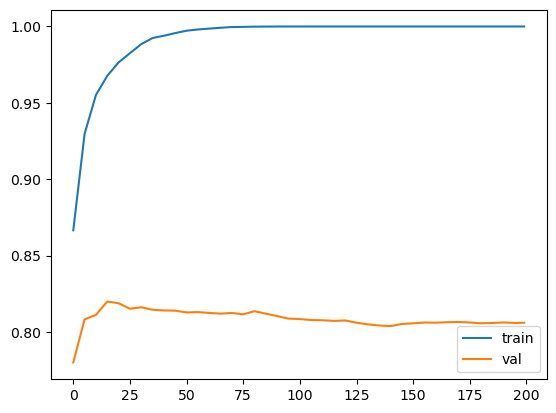

In [79]:
# x-axis - number of iterations
# y-axis - auc
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

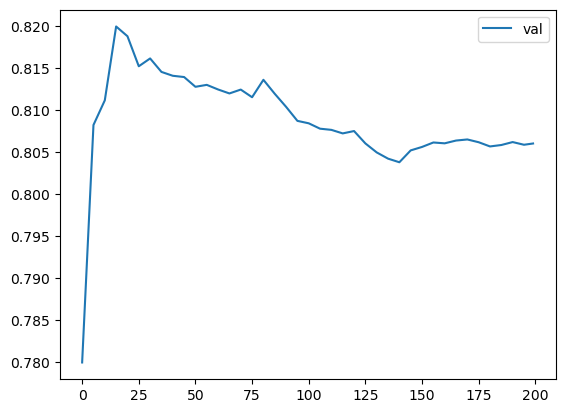

In [80]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

The model is overfitting as seen in the validation graph, where performance improves on the training data but decreases on the validation data over time

### parameters tunung

### 1- eta

### Eta = 0.3


In [81]:
scores = {}

In [82]:
%%capture output
 
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
     
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

In [83]:
'eta=%s' % (xgb_params['eta'])


'eta=0.3'

In [84]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key
 

'eta=0.3'

In [85]:
scores

{'eta=0.3':     num_iter  train_auc  val_auc
 0          0    0.86653  0.77999
 1          5    0.92969  0.80822
 2         10    0.95512  0.81115
 3         15    0.96767  0.81993
 4         20    0.97648  0.81877
 5         25    0.98248  0.81520
 6         30    0.98844  0.81613
 7         35    0.99244  0.81453
 8         40    0.99393  0.81407
 9         45    0.99568  0.81392
 10        50    0.99723  0.81276
 11        55    0.99804  0.81299
 12        60    0.99861  0.81244
 13        65    0.99916  0.81197
 14        70    0.99962  0.81243
 15        75    0.99975  0.81152
 16        80    0.99989  0.81359
 17        85    0.99993  0.81193
 18        90    0.99998  0.81038
 19        95    0.99999  0.80871
 20       100    0.99999  0.80842
 21       105    1.00000  0.80778
 22       110    1.00000  0.80764
 23       115    1.00000  0.80722
 24       120    1.00000  0.80750
 25       125    1.00000  0.80603
 26       130    1.00000  0.80496
 27       135    1.00000  0.80422
 28

In [87]:
scores['eta=0.3']

,num_iter,train_auc,val_auc
0,0,0.86653,0.77999
1,5,0.92969,0.80822
2,10,0.95512,0.81115
3,15,0.96767,0.81993
4,20,0.97648,0.81877
5,25,0.98248,0.81520
6,30,0.98844,0.81613
7,35,0.99244,0.81453
8,40,0.99393,0.81407
9,45,0.99568,0.81392


### Eta = 1.0


In [88]:
%%capture output
 
xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [89]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1.0'

In [90]:
scores['eta=1.0']

,num_iter,train_auc,val_auc
0,0,0.86653,0.77999
1,5,0.96126,0.78834
2,10,0.98555,0.78862
3,15,0.99523,0.78400
4,20,0.99943,0.78606
5,25,0.99997,0.79065
6,30,1.00000,0.78718
7,35,1.00000,0.78548
8,40,1.00000,0.78776
9,45,1.00000,0.78904


In [91]:
scores

{'eta=0.3':     num_iter  train_auc  val_auc
 0          0    0.86653  0.77999
 1          5    0.92969  0.80822
 2         10    0.95512  0.81115
 3         15    0.96767  0.81993
 4         20    0.97648  0.81877
 5         25    0.98248  0.81520
 6         30    0.98844  0.81613
 7         35    0.99244  0.81453
 8         40    0.99393  0.81407
 9         45    0.99568  0.81392
 10        50    0.99723  0.81276
 11        55    0.99804  0.81299
 12        60    0.99861  0.81244
 13        65    0.99916  0.81197
 14        70    0.99962  0.81243
 15        75    0.99975  0.81152
 16        80    0.99989  0.81359
 17        85    0.99993  0.81193
 18        90    0.99998  0.81038
 19        95    0.99999  0.80871
 20       100    0.99999  0.80842
 21       105    1.00000  0.80778
 22       110    1.00000  0.80764
 23       115    1.00000  0.80722
 24       120    1.00000  0.80750
 25       125    1.00000  0.80603
 26       130    1.00000  0.80496
 27       135    1.00000  0.80422
 28

### Eta = 0.1


In [92]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


In [93]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [94]:
scores['eta=0.1']

,num_iter,train_auc,val_auc
0,0,0.86653,0.77999
1,5,0.90462,0.79276
2,10,0.91936,0.80573
3,15,0.93128,0.81241
4,20,0.94007,0.81551
5,25,0.94698,0.81664
6,30,0.95175,0.81942
7,35,0.95668,0.82229
8,40,0.96125,0.82243
9,45,0.96437,0.82507


### Eta = 0.05


In [95]:
%%capture output
 
xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [96]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.05'

In [97]:
scores['eta=0.05']

,num_iter,train_auc,val_auc
0,0,0.86653,0.77999
1,5,0.88634,0.79497
2,10,0.90122,0.79380
3,15,0.90940,0.80111
4,20,0.91725,0.80696
5,25,0.92357,0.80785
6,30,0.92911,0.80999
7,35,0.93427,0.81284
8,40,0.93912,0.81369
9,45,0.94399,0.81552


### Eta = 0.01


In [98]:
%%capture output
 
xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [99]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [100]:
scores['eta=0.01']

,num_iter,train_auc,val_auc
0,0,0.86653,0.77999
1,5,0.87039,0.77827
2,10,0.87211,0.77828
3,15,0.87412,0.78300
4,20,0.87621,0.78749
5,25,0.88611,0.79587
6,30,0.89308,0.79968
7,35,0.89641,0.79983
8,40,0.89874,0.79885
9,45,0.90041,0.79691


### Plotting Eta


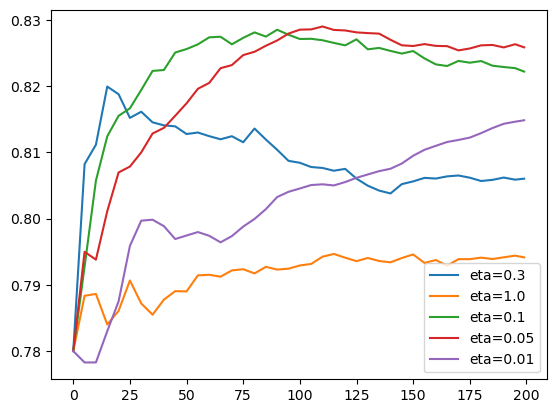

In [101]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

#### clearer view

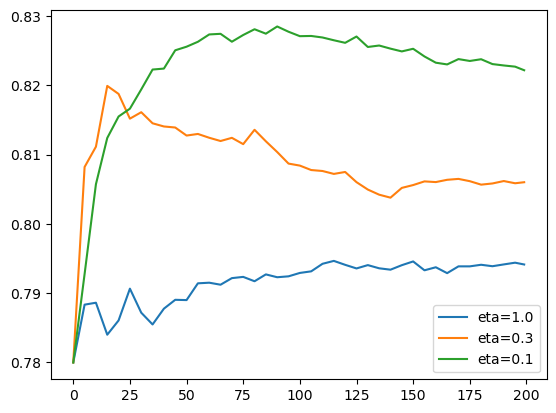

In [102]:
etas = ['eta=1.0', 'eta=0.3', 'eta=0.1']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

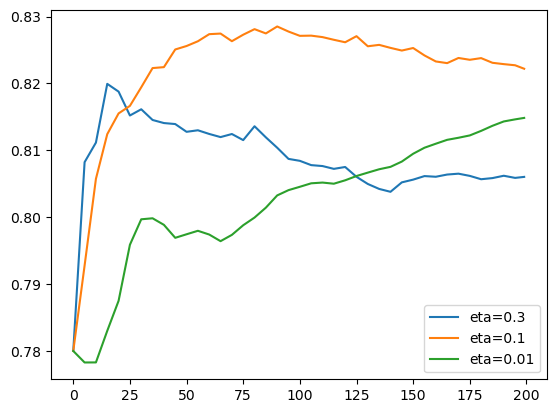

In [103]:
etas = ['eta=0.3', 'eta=0.1', 'eta=0.01']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

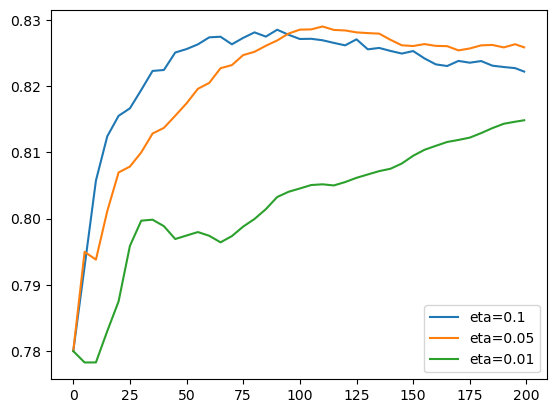

In [104]:
etas = ['eta=0.1', 'eta=0.05', 'eta=0.01']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

it’s evident that the ‘eta=0.1’ model stands out as the best option, as it achieves better performance with fewer steps.

### max_depth

#### max_depth=6


In [109]:
scores = {}

In [110]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [111]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

#### max_depth=3


In [112]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [114]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=3'

#### max_depth=4


In [115]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [116]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=4'

#### max_depth=10


In [117]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [118]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

#### Plotting max_depth


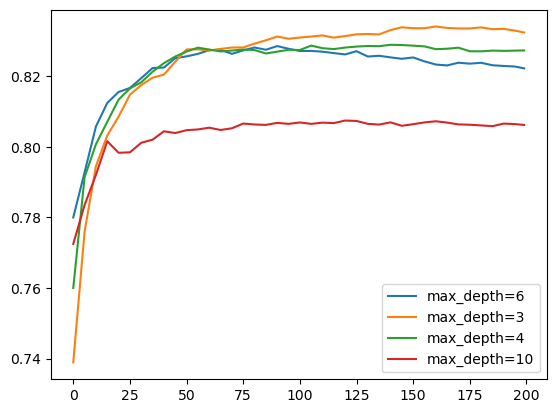

In [121]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
 
plt.legend()

 depth of 10 is worst. So we can delete it

In [122]:
del scores['max_depth=10']

#### clearer view between 0.8 and 0.84

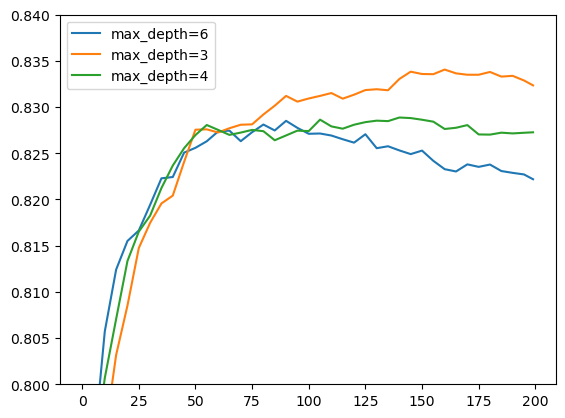

In [123]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
 
plt.ylim(0.8, 0.84)
plt.legend()

 ‘max_depth‘ of 3 is the best 

### min_child_weight


#### min_child_weight=1

In [124]:
scores = {}

In [125]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [126]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

#### min_child_weight=10

In [127]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 10,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [128]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=10'

#### min_child_weight=30

In [129]:
%%capture output
 
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [130]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

#### Plotting min_child_weight


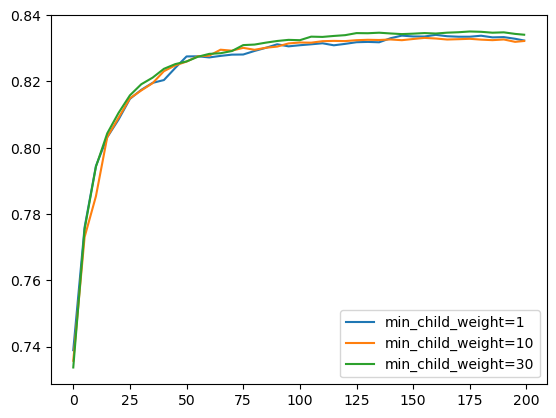

In [131]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
 
plt.legend()

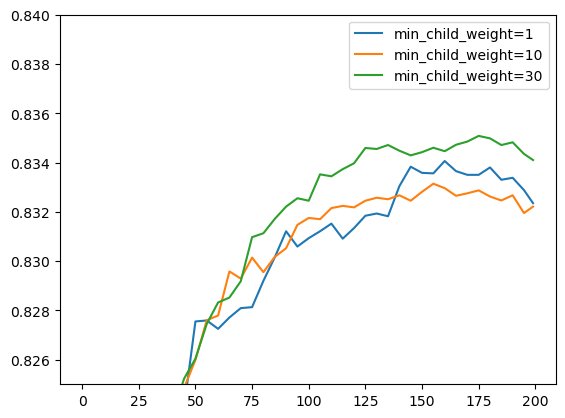

In [133]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
 
plt.ylim(0.825, 0.84)
plt.legend()

‘min_child_weight‘ of 30 appears to be the best-performing value

#### Train final model


In [134]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=175)

### Choosing between XGBoost, random forest and decision tree

### Decision Tree 

In [135]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

### Random Forest

In [136]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)
 

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

### XGBoost 

In [137]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model = xgb.train(xgb_params, dtrain, num_boost_round=175)

### Evaluate all the best of models on validation data


In [138]:
# Decision Tree
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)
 

0.7856948245380349

In [139]:
# Random Forest
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [140]:
# XGBoost Model
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8334715797631446

XGBoost model has the best auc score. We’ll use this to train the final model.

### Training the final model

In [141]:
df_full_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3668,ok,22,owner,48,48,married,no,fixed,60,110.0,3000.0,0.0,1000,1460
2540,default,8,other,60,41,married,no,freelance,45,62.0,0.0,0.0,1800,2101
279,ok,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
3536,ok,1,owner,12,61,married,no,others,45,103.0,20000.0,0.0,300,650
3866,ok,13,owner,60,27,married,no,fixed,35,253.0,7000.0,0.0,1060,1750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,default,4,owner,60,47,married,no,freelance,75,0.0,13500.0,0.0,1900,1976
1293,ok,2,rent,60,28,single,no,fixed,45,101.0,0.0,0.0,1300,1333
4023,ok,2,parents,36,25,single,no,fixed,35,110.0,0.0,0.0,500,1200
3775,ok,4,other,60,25,single,no,fixed,35,162.0,0.0,0.0,1800,2999


In [142]:
df_full_train = df_full_train.reset_index(drop=True)

In [143]:
y_full_train = (df_full_train.status == 'default').astype(int).values
y_full_train

array([0, 1, 0, ..., 0, 0, 1])

In [144]:
del df_full_train['status']

In [145]:
dicts_full_train = df_full_train.to_dict(orient='records')
 
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
 
dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [146]:
feature_names = list(dv.get_feature_names_out())
feature_names

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

XGBoost models require data in the form of DMatrix

In [149]:
feature_names = list(dv.get_feature_names_out())
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=feature_names)
 
dtest = xgb.DMatrix(X_test, feature_names=feature_names)


In [152]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)


In [153]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.831618689213626